# Efeito Rossiter McLaughlin

* PET - Física
* Petiano: Bruno Ramos Galindo
* Data: 15/11/2024


Neste `Notebook` temos como obejtivo entender o efeito Rossiter McLauglin e aplicar esse efeito em códigos que possibilitem a determinação da velocidade rotacional da estrela e a inclinação entre o plano orbital do exoplaneta e o equador da estrela.

## Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import corner
import matplotlib.pyplot as plt
from importlib import reload
from matplotlib import rcParams
import rmfit
import batman

## 1 - Introdução

$\quad$ O trânsito planetário foi observado pela primeira vez no ano de 1639, por Jeremiah Horrocks. Ele observou o planeta vênus passando pelo disco estelar do Sol. Embora, no ano de 1611, Christoph Scheiner, observou um sistema de planetas próximos ao Sol, que interpretou erroniamente e pensou que se tratava de manchas solares no Sol. Scheiner observou as "Manchas Solares" por anos e descobriu que o equador do Sol está inclinado em um ângulo de 7º em relação ao plano orrbital da Terra.

$\quad$ Atualmente, sabemos da existência de várias estrelas que possuem um exoplaneta  as orbitando. Nestes exoplanetas, podem ocorrer um desalinhamento entre o plano orbital do exoplaneta e o equador da estrela, para esse inclinação damos o nome de obliquidade estelar.

$\quad$ O metodo utilizado por Christoph Scheiner não pode ser usado para exoplanetas e não podemos observar o exoplaneta passar pelo disco estelar com nosso telescópios. Em vez disso, podemos obter a obliquiadade estelar usando um fenômeno chamado de efieto Rossiter McLaughlin (RM). O efeito é observado no transito planétario, ele consiste na absorção das linhas de velocidade radial no espectro eletromagnético pelo exoplaneta, quando parte da rotação da estrela é escondida pelo exoplaneta. Quando a estrela realiza o movimento de rotação uma parte se "aproxima" de nós e outra parte se "afasta" de nós. A parte se aproximando terá um **Blue Shift**(desvio para o azul) e a parte se afastando terá um **Red Shift**(desvio para o vermelho).

$\quad$ Da mesma forma, quando a metade da estrela com desvio para o vermelho (recuo) está bloqueada, o espectro é desviado para o azul. O resultado é um “deslocamento Doppler anômalo” que varia ao longo do eclipse. Monitorando as linhas estelares feitas por eclipses, podemos medir a obliquidade estelar. Tal fenomeno foi previsto por Holt em 1893, mas observado somente em 1924 por Rossiter e McLaughlin.

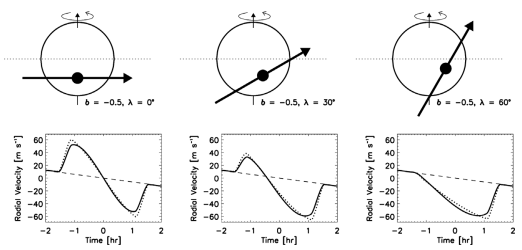

Na figura acima temos três transitos planetários que produzem curvas de luz geometricamente idênticas apesar de diferirem no alinhamento orbital em relação ao eixo de rotação da estrela; em baixo, temos as respectivas velocidades radiais. À esquerda: um alinhamento aproximado entre o plano orbital da estrela e o eixo de rotação da estrela produzindo um efeito de doppler simétrico; no centro, uma inclinação de 30° produz um sinal assimétrico e à direita, uma inclinação de 60° produz apenas blueshift. Crédito: Gaudi & Winn (2007).

Para determinar a variação de velocidade radial podemos utilizar  a equação dada por:

$$\Delta V_{rad} \sim \left(\frac{R_p}{R_*}\right)\sqrt{1-b^2}(v_*sini_*) \tag{1.1}$$

Sendo $R_p$ o raio do exoplaneta; $R_*$ o raio da estrela; $b$ é o parametro de impacto; $v_*sini_*$ é a velocidade rotacional da estrela. O parametro de impacto é o valor que determina onde o exoplaneta está em relação ao equador da estrela.



## 2 - Simulação Montecarlo com correntes Markov

MCMC, de forma resumida, é ampla ferramenta computacional aproximação de integrais e geração de amostras de uma probabilidade posterior.

# 3 - Implementando os códigos

Aplicando condições para a plotagem do gráfico:

In [29]:
rcParams["axes.formatter.useoffset"] = False
rcParams['axes.formatter.limits'] = -15,15
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'

 A seguir usamos a Equação **(1.1)** e definimos uma série de parâmetros físicos que são essenciais para a modelagem de sistemas estelares e planetários. Inicialmente, definimos os valores do raio da estrela (R_s) e do planeta (R_p) em unidades solares, além da velocidade de rotação da estrela (v_rot) em km/s. A inclinação orbital (i_orbit) é fixada em 90 graus, o que implica um trânsito frontal, e o parâmetro de impacto (b) é configurado como 0.5, representando a distância mínima entre o centro da estrela e a trajetória do planeta, em unidades do raio da estrela.

In [54]:
plt.style.use('default')
# Parâmetros físicos
R_s = 1.146          # Raio da estrela em unidades solares
R_p = 0.00138         # Raio do planeta em unidades solares
v_rot = -3.75       # Velocidade de rotação da estrela em km/s
i_orbit = 90       # Inclinação orbital em graus (assumimos trânsito frontal)
b = 0.5           # Impact parameter (distância mínima do centro da estrela em unidades de R_s)
# Parâmetros físicos
R_s2 = 1.146
R_p2 = 0.00138
v_rot2 = -5
i_orbit = 90
b2 = 0.5
# Parâmetros físicos
R_s2 = 1.146
R_p2 = 0.00138
v_rot3 = -2.75
i_orbit = 90
b2 = 0.5

os parâmetros são repetidos para diferentes configurações (R_s2, R_p2, v_rot2, entre outros), com pequenas variações na velocidade de rotação da estrela (v_rot2 e v_rot3), mantendo os outros parâmetros constantes. O bloco de código abaixo define os parâmetros para simular o trânsito de um planeta em frente à sua estrela, considerando diferentes cenários.



In [55]:
# Parâmetros do trânsito
t_total = 0.5      # Duração total do trânsito em horas
n_points = 100     # Número de pontos para simulação
tempo = np.linspace(-t_total/2, t_total/2, n_points)

# Cálculo da posição do planeta durante o trânsito
x_planet = np.linspace(-np.sqrt((R_s + R_p)**2 - b**2), np.sqrt((R_s + R_p)**2 - b**2), n_points)
y_planet = np.full_like(x_planet, b)

x_planet2 = np.linspace(-np.sqrt((R_s2 + R_p2)**2 - b2**2), np.sqrt((R_s2 + R_p2)**2 - b2**2), n_points)
y_planet2 = np.full_like(x_planet2, b2)

x_planet3 = np.linspace(-np.sqrt((R_s2 + R_p2)**2 - b2**2), np.sqrt((R_s2 + R_p2)**2 - b2**2), n_points)
y_planet3 = np.full_like(x_planet2, b2)

No bloco a seguir, temos a função `efeito_rossiter_mcLaughlin` que calcula o efeito Rossiter-McLaughlin, que descreve a variação na velocidade radial observada durante um trânsito planetário, devido ao movimento do planeta sobre a superfície estelar.

In [56]:
# Função para calcular o efeito Rossiter-McLaughlin
def efeito_rossiter_mcLaughlin(x, y, R_s, R_p, v_rot):
    # Verificar a posição do planeta dentro do disco estelar
    r = np.sqrt(x**2 + y**2)
    dentro_estelar = r < R_s

    # Velocidade radial devido à rotação estelar
    v_proj = np.where(dentro_estelar, v_rot * (x / R_s), 0)

    # Bloquear a velocidade radial nas posições onde o planeta cobre a estrela
    bloqueado = r < R_p
    v_proj[bloqueado] = 0

    # Retornar a velocidade radial observável (média sobre o disco visível)
    return np.mean(v_proj)

Esse trecho de código aplica a função `efeito_rossiter_mcLaughlin` para calcular as variações na velocidade radial ($\Delta V$) ao longo do trânsito planetário em três cenários diferentes.

In [57]:
# Aplicar a função para cada posição do planeta durante o trânsito
delta_Vs = np.array([efeito_rossiter_mcLaughlin(x, y_planet[i], R_s, R_p, v_rot) for i, x in enumerate(x_planet)])

delta_Vs2 = np.array([efeito_rossiter_mcLaughlin(x, y_planet2[i], R_s2, R_p2, v_rot2) for i, x in enumerate(x_planet)])

delta_Vs3 = np.array([efeito_rossiter_mcLaughlin(x, y_planet3[i], R_s2, R_p2, v_rot3) for i, x in enumerate(x_planet)])

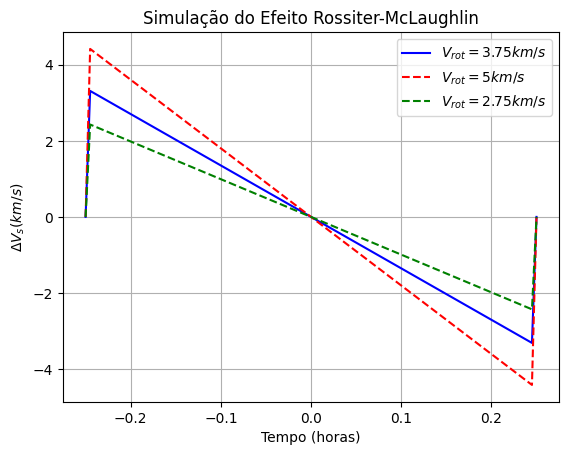

In [58]:
# Visualizar o efeito Rossiter-McLaughlin
plt.plot(tempo, delta_Vs, color='blue', label="$V_{rot}=3.75km/s$")
plt.plot(tempo,delta_Vs2,color='red',linestyle='--',label='$V_{rot}=5km/s$')
plt.plot(tempo,delta_Vs3,color='green',linestyle='--',label='$V_{rot}=2.75km/s$')
plt.xlabel("Tempo (horas)")
plt.ylabel("$\Delta V_s (km/s)$")
plt.title("Simulação do Efeito Rossiter-McLaughlin")
plt.legend()
plt.grid(True)
plt.show()

Abaixo utilizamos os dados baixados para a aplicação do código

In [5]:
# Albrecht et al. 2012
# https://ui.adsabs.harvard.edu/abs/2012ApJ...757...18A/abstract
df = pd.read_csv('/content/sample_data/albrecht2012.csv',comment='#',sep=';')
df.name.unique()
df = df[df.name=='HAT-P-2'].reset_index(drop=True)
df

name           bjd      rv f_RVel   e_rv   inst
0   HAT-P-2  2.454258e+06  107.29    NaN  11.47  HIRES
1   HAT-P-2  2.454258e+06  113.38    NaN  11.27  HIRES
2   HAT-P-2  2.454258e+06  102.73    NaN  11.29  HIRES
3   HAT-P-2  2.454258e+06   73.36    NaN  11.12  HIRES
4   HAT-P-2  2.454258e+06   72.43    NaN  10.98  HIRES
..      ...           ...     ...    ...    ...    ...
92  HAT-P-2  2.454258e+06 -278.41    NaN  10.80  HIRES
93  HAT-P-2  2.454258e+06 -297.41    NaN  10.85  HIRES
94  HAT-P-2  2.454258e+06 -350.56    NaN  11.02  HIRES
95  HAT-P-2  2.454258e+06 -352.35    NaN  11.08  HIRES
96  HAT-P-2  2.454258e+06 -361.36    NaN  10.89  HIRES

[97 rows x 6 columns]

Gráfico da Velocidade Radial (RV) em função do Tempo (BJD) para o exoplaneta HAT-P-2b. As medições de RV são mostradas como pontos pretos, com barras de erro representando as incertezas associadas a cada observação. O tempo é dado em dias julianos baricêntricos (BJD), e a velocidade radial é expressa em metros por segundo (m/s). Este gráfico ilustra as variações da RV da estrela devido à interação com o planeta durante o trânsito, com base nas observações realizadas ao longo do tempo

Text(0, 0.5, 'RV [m/s]')

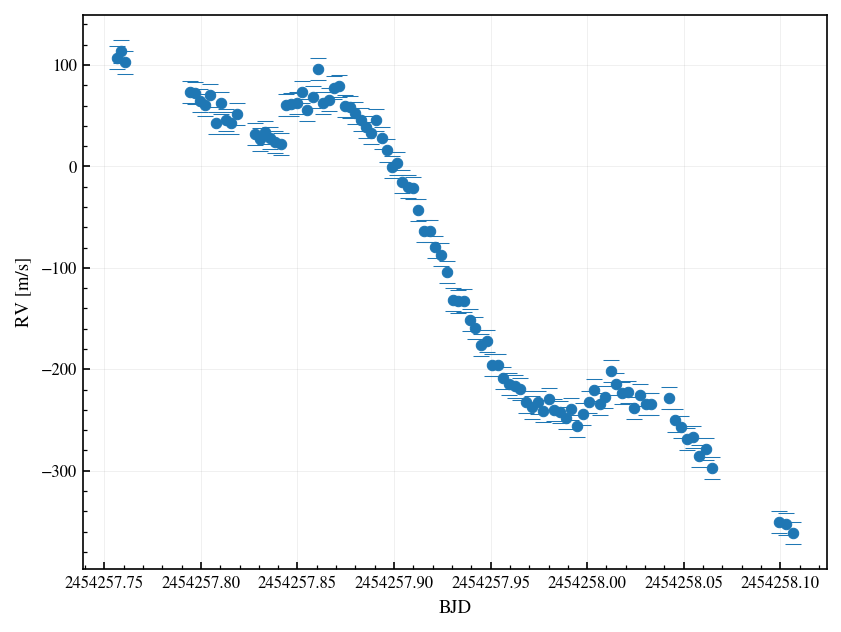

In [8]:
fig, ax = plt.subplots(dpi=150)
ax.errorbar(df.bjd.values,df.rv,df.e_rv,marker='o',lw=0,mew=0.5,capsize=4)
rmfit.utils.ax_apply_settings(ax,ticksize=8)
ax.set_xlabel('BJD')
ax.set_ylabel('RV [m/s]')

Abaixo carregamos um arquivo de priors (informações prévias sobre os parâmetros) chamado `hatp2_priors.dat` e utilizamos esses dados, junto com as medições de tempo (`df.bjd.values`), velocidade radial (`df.rv.values`) e incertezas nas medições (`df.e_rv.values`), para configurar uma função de probabilidade (`LPFunction`). Essa função é então passada para o objeto RMFit, que é responsável por ajustar o modelo aos dados observacionais, levando em conta as priors definidas no arquivo e as incertezas associadas às medições. Esse processo prepara a análise e o ajuste do modelo de velocidade radial.

In [48]:
data = '/content/sample_data/hatp2_priors.dat'
dados = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,data)
tabela = rmfit.rmfit.RMFit(dados)

Reading in priorfile from /content/sample_data/hatp2_priors.dat
   prior          arg1       arg2        label  description priortype  fixed
0     NP  2.454213e+06    0.00060        t0_p1        t0_p1     model  False
1     NP  5.633410e+00    0.00013         P_p1         P_p1     model  False
2     UP -1.800000e+02  180.00000       lam_p1       lam_p1     model  False
3     UP  0.000000e+00   30.00000        vsini        vsini     model  False
4     UP  8.500000e+01   90.00000       inc_p1       inc_p1     model  False
5     NP  7.227000e-02    0.00070         p_p1         p_p1     model  False
6     NP  9.000000e+00    3.00000         a_p1         a_p1     model  False
7     NP  3.000000e-01    0.05000           u1           u1     model  False
8     NP  3.000000e-01    0.05000           u2           u2     model  False
9     NP  5.010000e-01    0.00700       ecc_p1       ecc_p1     model  False
10    NP -1.726000e+02    1.60000     omega_p1     omega_p1     model  False
11    NP  5.

O comando `tabela.minimize_PyDE(mcmc=False)` realiza uma minimização da função de probabilidade utilizando o método PyDE (uma técnica de otimização), sem recorrer ao MCMC. Ou seja, ele encontra o melhor ajuste para os parâmetros do modelo de forma determinística, tentando minimizar a diferença entre o modelo e os dados observacionais, usando uma abordagem mais direta, sem amostragem estocástica.

In [33]:
tabela.minimize_PyDE(mcmc=False)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
      labels       centers         lower         upper            pv  center_dist
0      t0_p1  2.454213e+06  2.454213e+06  2.454213e+06  2.454213e+06     0.000076
1       P_p1  5.633410e+00  5.632760e+00  5.634060e+00  5.633436e+00    -0.000026
2     lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  7.114829e+00    -7.114829
3      vsini  1.500000e+01  0.000000e+00  3.000000e+01  1.721862e+01    -2.218625
4     inc_p1  8.750000e+01  8.500000e+01  9.000000e+01  8.813640e+01    -0.636399
5       p_p1  7.227000e-02  6.877000e-02  7.577000e-02  7.273137e-02    -0.000461
6       a_p1  9.000000e+00 -6.000000e+00  2.400000e+01  1.023082e+01    -1.230825
7         u1  3.000000e-01  5.000000e-02  5.500000e-01  3.131531e-01    -0.013153
8         u2  3.000000e-01  5.000000e-02  5.500000e-01  2.988975e-01     0.001103
9     ecc_p1  5.010000e-01  4.660000e-01  5.360000e-01  4.954293e-01     0.005571
10  omega_p1 -1.726000e+02 -1.806000

O comando `tabela.plot_fit(tabela.min_pv)` plota o ajuste do modelo utilizando os parâmetros ótimos encontrados na minimização, representados por `tabela.min_pv`. Ele gera um gráfico com a curva do modelo ajustado, comparando visualmente os dados observacionais com a melhor solução encontrada para os parâmetros do modelo, mostrando como o modelo se encaixa nos dados após a minimização.

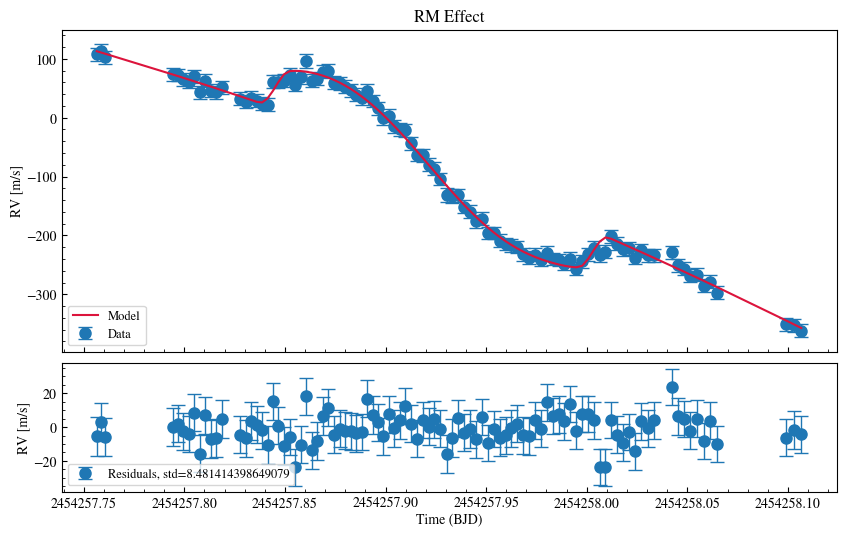

In [34]:
tabela.plot_fit(tabela.min_pv)

O comando `tabela.minimize_PyDE(mcmc=True, mc_iter=1000)` realiza a minimização da função de probabilidade utilizando o método PyDE, mas desta vez com o MCMC (Monte Carlo Markov Chain). A opção `mcmc=True` indica que, ao invés de uma otimização determinística, será feita uma amostragem estocástica dos parâmetros do modelo. O parâmetro `mc_iter=1000` especifica que o MCMC realizará 1000 iterações para explorar o espaço de parâmetros e gerar as distribuições posteriores dos parâmetros. Esse processo é usado para estimar as incertezas dos parâmetros e construir uma distribuição de probabilidade para cada um deles.

In [37]:
tabela.minimize_PyDE(mcmc=True,mc_iter=1000)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
      labels       centers         lower         upper            pv  center_dist
0      t0_p1  2.454213e+06  2.454213e+06  2.454213e+06  2.454213e+06    -0.000300
1       P_p1  5.633410e+00  5.632760e+00  5.634060e+00  5.633408e+00     0.000002
2     lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  8.130232e+00    -8.130232
3      vsini  1.500000e+01  0.000000e+00  3.000000e+01  1.677405e+01    -1.774048
4     inc_p1  8.750000e+01  8.500000e+01  9.000000e+01  8.903428e+01    -1.534282
5       p_p1  7.227000e-02  6.877000e-02  7.577000e-02  7.228245e-02    -0.000012
6       a_p1  9.000000e+00 -6.000000e+00  2.400000e+01  1.057336e+01    -1.573361
7         u1  3.000000e-01  5.000000e-02  5.500000e-01  3.443559e-01    -0.044356
8         u2  3.000000e-01  5.000000e-02  5.500000e-01  3.213811e-01    -0.021381
9     ecc_p1  5.010000e-01  4.660000e-01  5.360000e-01  4.978280e-01     0.003172
10  omega_p1 -1.726000e+02 -1.806000

Abaixo geramos um gráfico que visualiza o ajuste do modelo após o processo de MCMC. Ele plota a curva do modelo correspondente aos valores médios dos parâmetros obtidos a partir das distribuições posteriores geradas pelo MCMC. Além disso, o gráfico pode incluir as barras de erro ou intervalos de confiança, destacando as incertezas associadas ao ajuste. Essa visualização ajuda a comparar como o modelo ajustado se comporta em relação aos dados observados, considerando as estimativas mais prováveis dos parâmetros e suas variações.

No flatchain passed, defaulting to using full chains
Plotting curve with best-fit mcmc values


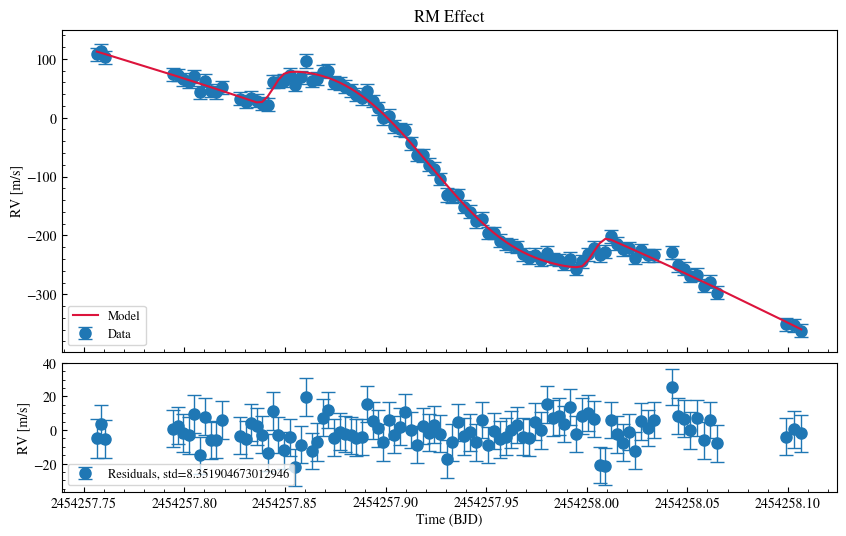

In [38]:
# Plot the MCMC fit
tabela.plot_mcmc_fit()

A variavel "dados_coletados" faz um "achatamento" das amostras, reorganizando o array em uma matriz 2D onde cada linha representa uma amostra posterior de parâmetros, e o número de colunas corresponde ao número de parâmetros ajustáveis. Isso facilita a análise e visualização posterior.

In [43]:
descarte = 200 #Define o número de iterações iniciais do MCMC a serem descartadas
maior_probabilidade = tabela.sampler.chain[:,descarte:,:] # Seleciona as amostras de MCMC após o descarte das primeiras 200 iterações
dados_coletados = maior_probabilidade.reshape((-1,len(tabela.lpf.ps_vary.priors)))
df2 = pd.DataFrame(dados_coletados,columns=tabela.lpf.ps_vary.labels)

In [49]:
rmfit.mcmc_help.gelman_rubin(maior_probabilidade)

array([1.1663679 , 1.18528103, 1.28006768, 1.17440117, 1.32708664,
       1.13654826, 1.30195059, 1.14737206, 1.2029468 , 1.1734741 ,
       1.17074366, 1.1530286 , 1.18402499, 1.17274068])

Abaixo criamos um gráfico visual detalhado que permite examinar as distribuições de probabilidade e as correlações entre os parâmetros ajustados após o MCMC, fornecendo insights importantes sobre a precisão e a interdependência dos parâmetros estimados.

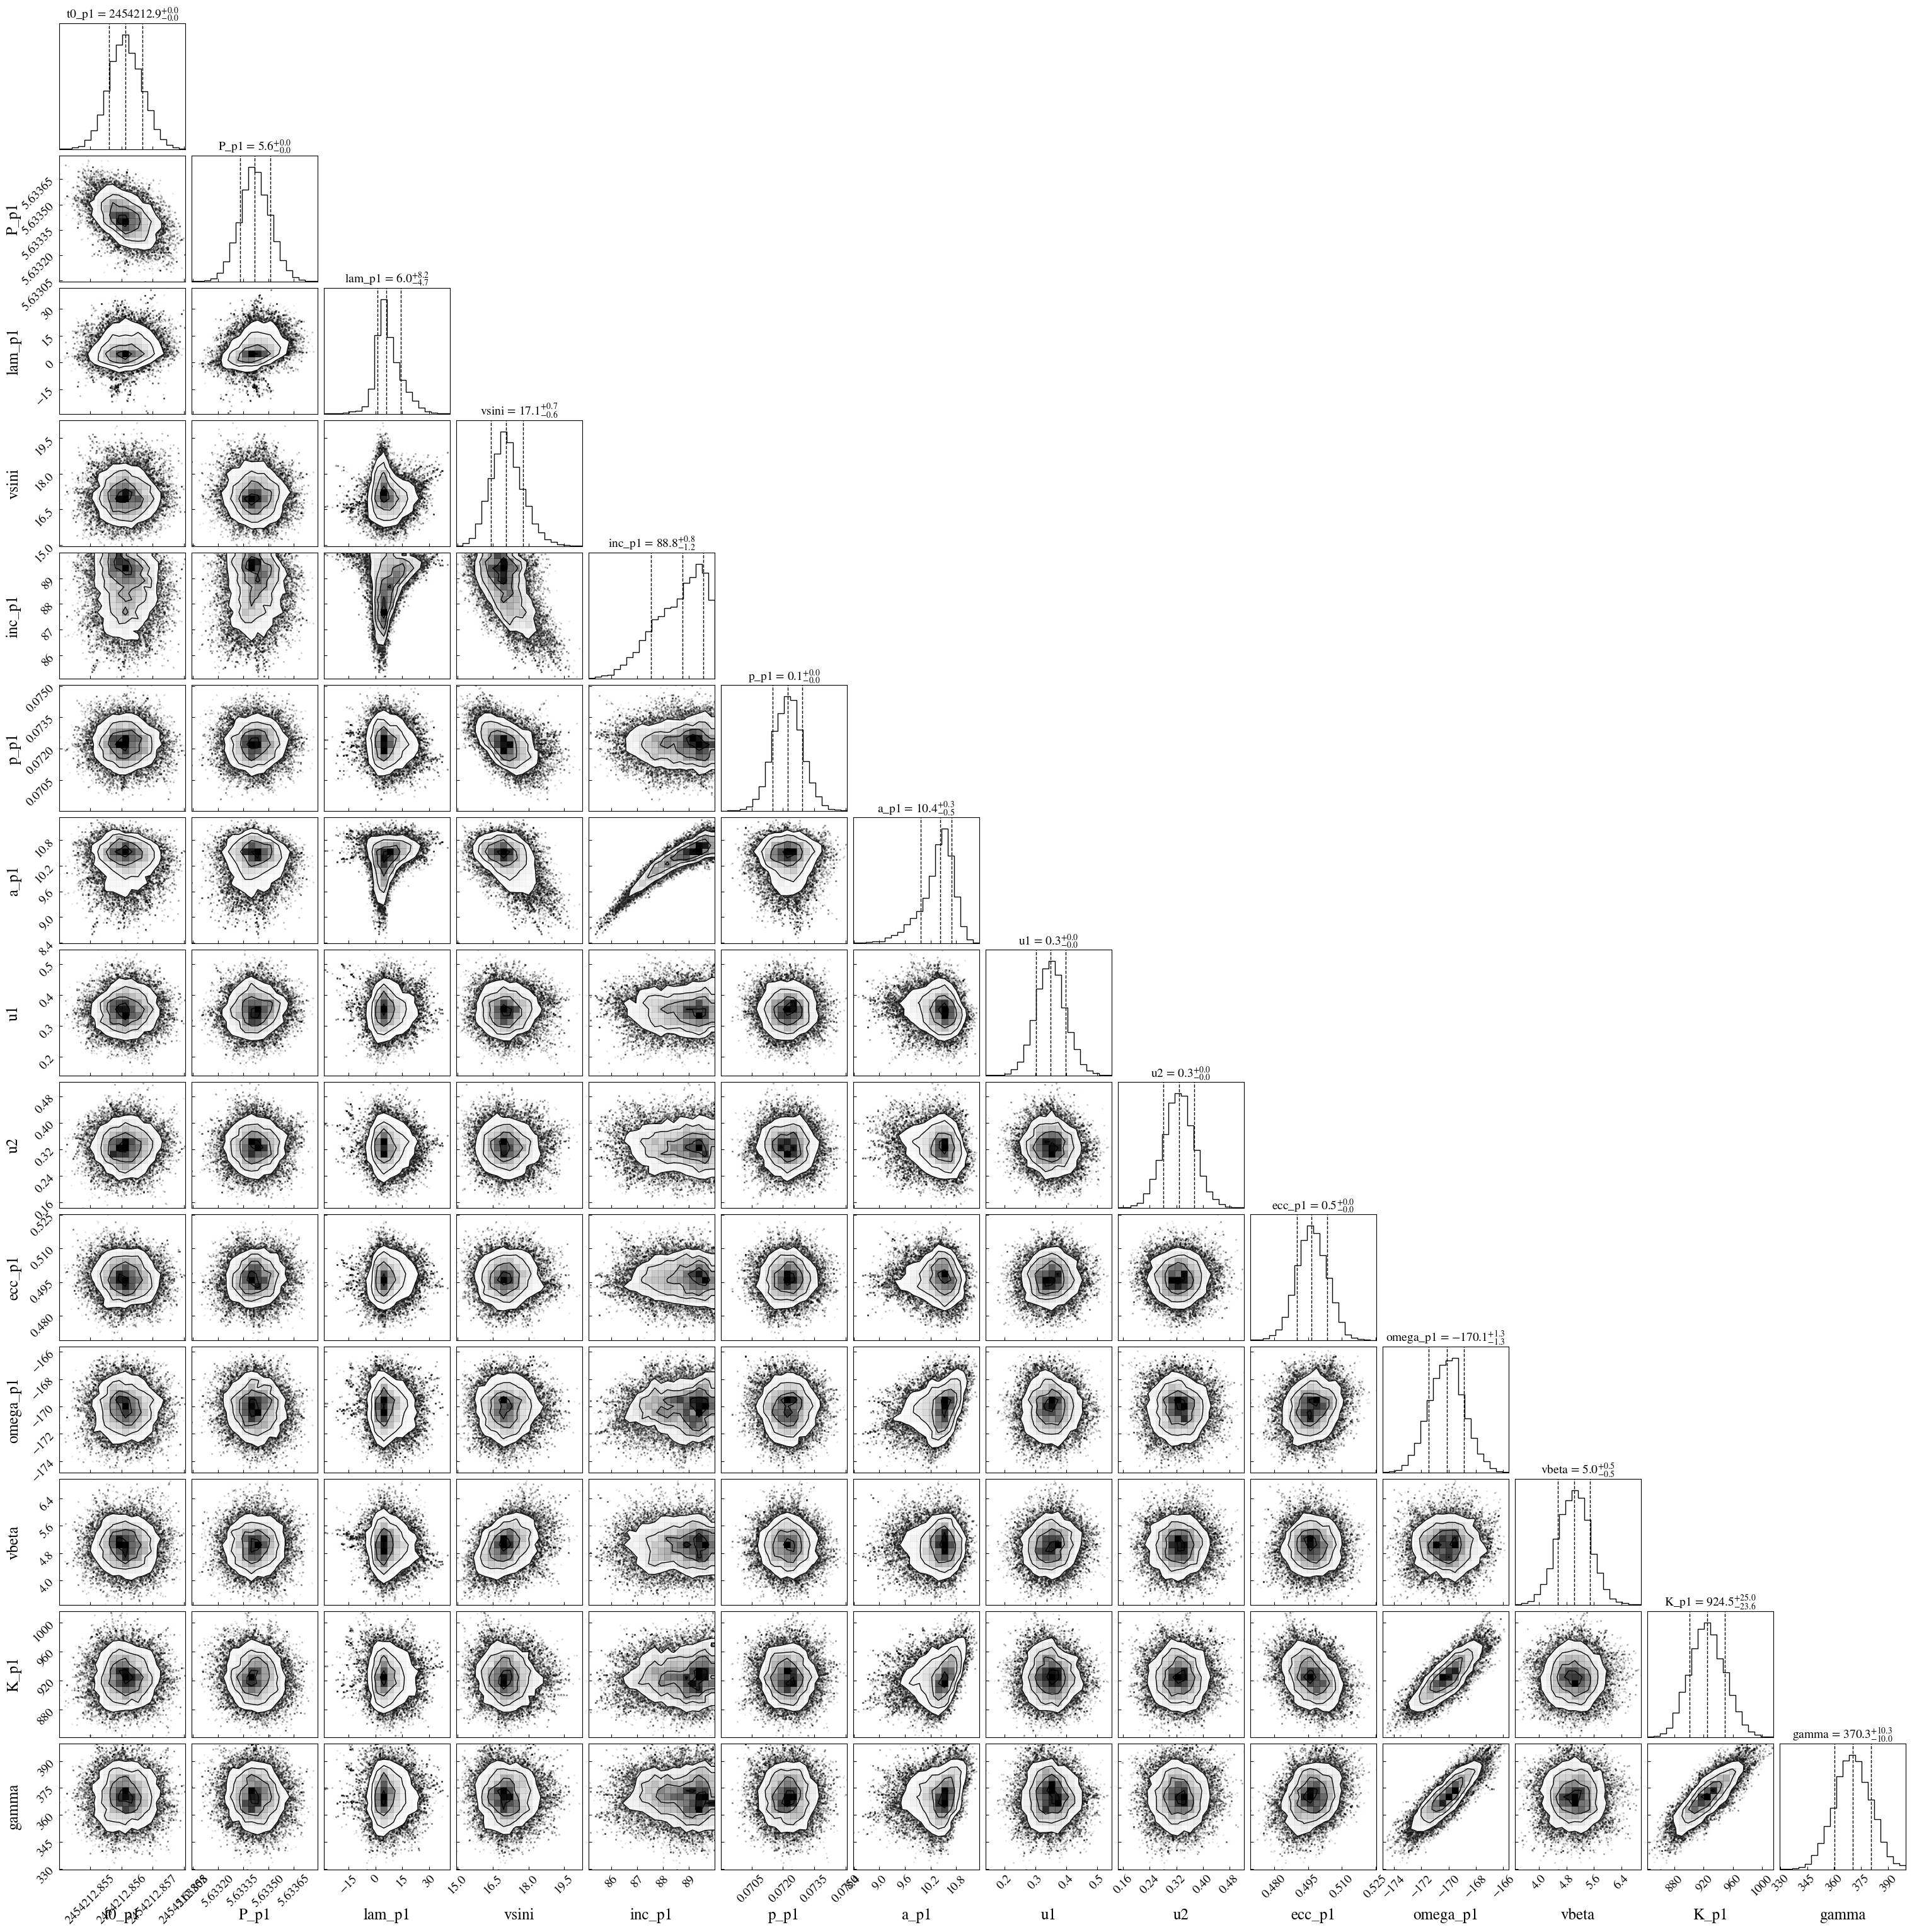

In [42]:
fig = rmfit.mcmc_help.plot_corner(maior_probabilidade,show_titles=True,labels=np.array(tabela.lpf.ps_vary.descriptions),title_fmt='.1f',xlabcord=(0.5, -0.2))

 Abaixo criamos uma visualização eficiente das distribuições posteriores para os parâmetros lam_p1 e vsini, incluindo intervalos de confiança e a mediana, para ajudar na interpretação das incertezas dos resultados do MCMC.

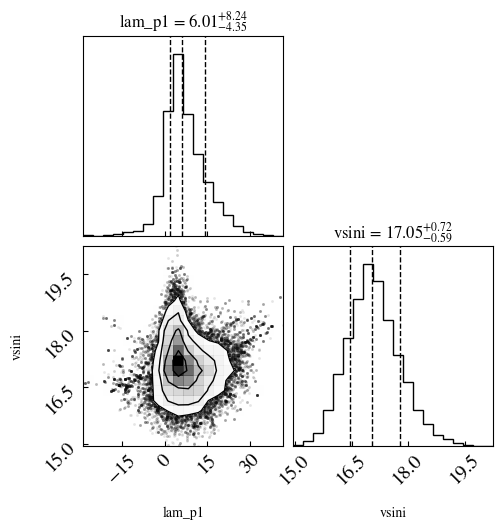

In [50]:
fig = corner.corner(df2[['lam_p1','vsini']],show_titles=True,quantiles=[0.18,0.5,0.84])
fig.dpi=100

O comando abaixo extrai os valores médios dos parâmetros ajustados após o MCMC, que representam as melhores estimativas desses parâmetros

In [45]:
df_media = tabela.get_mean_values_mcmc_posteriors(df2.values)

In [46]:
df_media

medvals      minus       plus                                 values  \
0  2.454213e+06   0.000515   0.000564  $2454212.85611_{-0.00051}^{+0.00056}$   
0  5.633418e+00   0.000088   0.000092       $5.633418_{-0.00009}^{+0.00009}$   
0  6.012614e+00   4.718325   8.244871                    $6.0_{-4.7}^{+8.2}$   
0  1.705226e+01   0.641665   0.720588                $17.05_{-0.64}^{+0.72}$   
0  8.876506e+01   1.218760   0.794077                 $88.77_{-1.2}^{+0.79}$   
0  7.222944e-02   0.000718   0.000685        $0.07223_{-0.00072}^{+0.00069}$   
0  1.042504e+01   0.453943   0.272957                $10.43_{-0.45}^{+0.27}$   
0  3.499154e-01   0.047056   0.048170               $0.35_{-0.047}^{+0.048}$   
0  3.278410e-01   0.046114   0.045957              $0.328_{-0.046}^{+0.046}$   
0  4.966334e-01   0.006560   0.006942           $0.4966_{-0.0066}^{+0.0069}$   
0 -1.701252e+02   1.317082   1.253036                 $-170.1_{-1.3}^{+1.3}$   
0  5.018295e+00   0.472474   0.462917                 $5.02_{-0.47}^{+0.46}$   
0  9.244576e+02  23.645257  24.951630                $924.0_{-24.0}^{+25.0}$   
0  3.702902e+02  10.010362  10.292545                $370.0_{-10.0}^{+10.0}$   

     Labels Description  
0     t0_p1       t0_p1  
0      P_p1        P_p1  
0    lam_p1      lam_p1  
0     vsini       vsini  
0    inc_p1      inc_p1  
0      p_p1        p_p1  
0      a_p1        a_p1  
0        u1          u1  
0        u2          u2  
0    ecc_p1      ecc_p1  
0  omega_p1    omega_p1  
0     vbeta       vbeta  
0      K_p1        K_p1  
0     gamma       gamma

Por fim criamos um gráfico que mostra os dados observacionais de velocidade radial (RV) com as incertezas e, ao mesmo tempo, exibe o modelo ajustado de RV (no caso, o modelo central a partir da mediana do MCMC). Onde temos o valor de lambda.

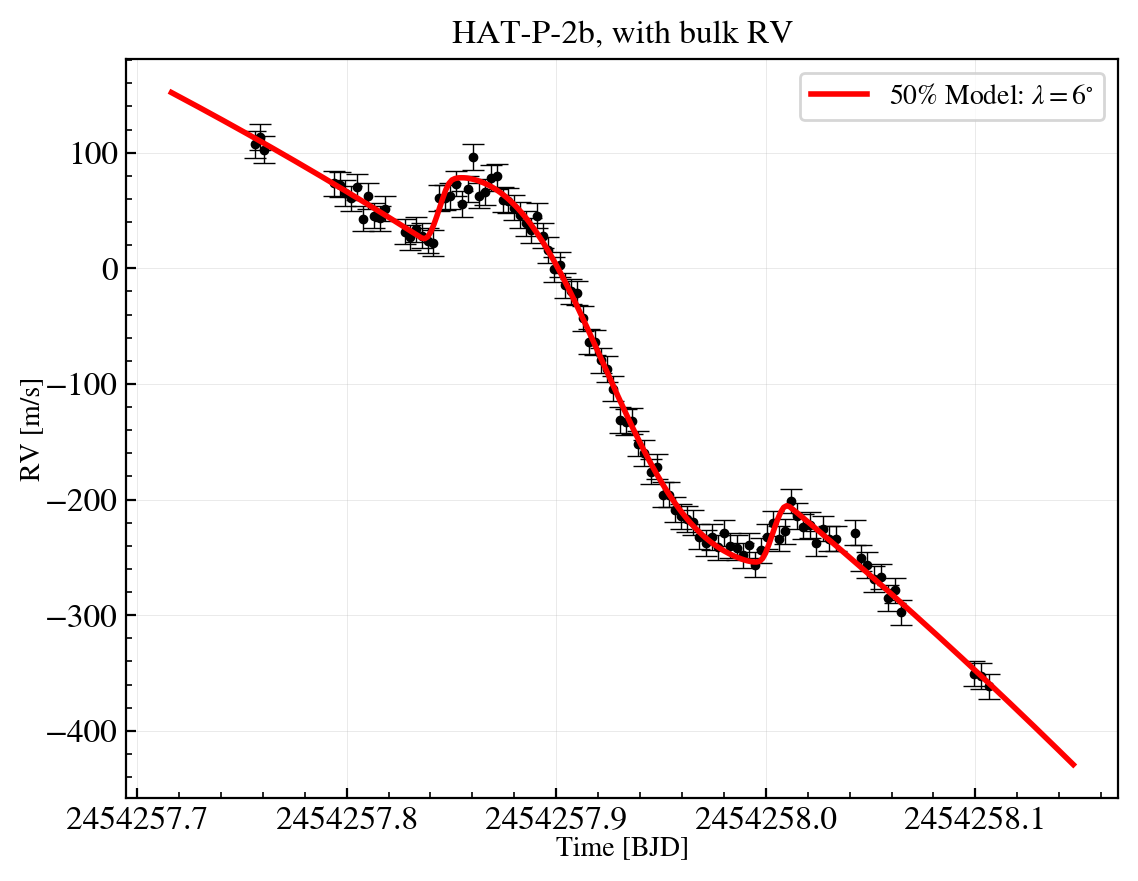

In [51]:
TITLE = 'HAT-P-2b'

tempo = np.linspace(tabela.lpf.data['x'][0]-0.02,TF.lpf.data['x'][-1]+0.02,500)
pv_50 = np.percentile(dados_coletados,[50],axis=0)[0]
t2 = np.linspace(tempo.min()-0.02,tempo.max()+0.02,300)
rv_50 = tabela.lpf.compute_total_model(pv_50,t2)

fig, ax = plt.subplots(dpi=200)

ax.errorbar(tabela.lpf.data['x'],tabela.lpf.data['y'],tabela.lpf.data['error'],
            marker='o',elinewidth=0.5,capsize=4,lw=0,mew=0.5,color="black",markersize=3)
ax.plot(t2,rv_50,color="red",
        label=r'50% Model: $\lambda=${:0.0f}'.format(pv_50[2])+'$^{\circ}$',lw=2.,zorder=10)

ax.legend(loc='upper right')
ax.set_xlabel('Time [BJD]',labelpad=0)
ax.set_ylabel('RV [m/s]',labelpad=0)
ax.set_title(TITLE)
rmfit.utils.ax_apply_settings(ax)

# Conclusão

Neste trabalho, abordamos a determinação da obliquidade estelar de um exoplaneta utilizando a técnica do efeito Rossiter-McLaughlin, que permite a modelagem da variação na velocidade radial observada durante o trânsito planetário. Esse efeito ocorre devido ao movimento do planeta sobre a superfície da estrela, influenciado pela rotação estelar.

Utilizamos dados reais de observações para realizar as simulações e obter uma estimativa precisa da obliquidade, que descreve o ângulo entre o eixo de rotação da estrela e o plano orbital do exoplaneta. Através de um processo de modelagem, simulações numéricas e o uso de métodos de inferência estatística, como o MCMC (Markov Chain Monte Carlo), conseguimos ajustar o modelo ao conjunto de dados observacionais, calculando as distribuições posteriores dos parâmetros do sistema estelar-planetário.

## Referências

**[1]** Storopoli, Jose. “Estatística Bayesiana Com R E Stan: Markov Chain Monte Carlo -- MCMC.” Estatística Bayesiana Com R E Stan, Aug. 2021, storopoli.io/Estatistica-Bayesiana/5-MCMC.html, https://doi.org/10.18637/jss.v076.i01;citation_issn=1548-7660;citation_author.

**[2]** Barbosa, Ruben. “Deteção de Exoplanetas: Efeito Rossiter-McLaughlin.” AstroPT - Informação E Educação Científica, 20 Apr. 2018, www.astropt.org/2018/04/20/detecao-de-exoplanetas-efeito-rossiter-mclaughlin/. Accessed 16 Nov. 2024.

**[3]** Winn, Joshua N. “The Rossiter-McLaughlin Effect for Exoplanets.” Proceedings of the International Astronomical Union, vol. 6, no. S276, Oct. 2010, pp. 230–237, https://doi.org/10.1017/s1743921311020230.

**[4]** Ohta, Yasuhiro, et al. “The Rossiter‐McLaughlin Effect and Analytic Radial Velocity Curves for Transiting Extrasolar Planetary Systems.” The Astrophysical Journal, vol. 622, no. 2, Apr. 2005, pp. 1118–1135, https://doi.org/10.1086/428344. Accessed 26 Mar. 2022.

**[5]** Cegla, H. M., et al. “The Rossiter-McLaughlin Effect Reloaded: Probing the 3D Spin-Orbit Geometry, Differential Stellar Rotation, and the Spatially-Resolved Stellar Spectrum of Star-Planet Systems.” Astronomy & Astrophysics, vol. 588, 30 Mar. 2016, p. A127, https://doi.org/10.1051/0004-6361/201527794. Accessed 17 Mar. 2022.